<a href="https://colab.research.google.com/github/Joykareko/Data-Science-Projects/blob/main/House_Price_Prediction_ML_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [4]:
#importing the dataset
housing_dataset = sklearn.datasets.load_boston()

In [7]:
#importing the dataset as a pandas dataframe
housing_dataset_df = pd.DataFrame(housing_dataset.data, columns = housing_dataset.feature_names)

In [8]:
housing_dataset_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [9]:
#adding the target column to the dataframe
housing_dataset_df['Price'] = housing_dataset.target

In [10]:
housing_dataset_df.shape

(506, 14)

In [11]:
housing_dataset_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [13]:
#checking for missing values
housing_dataset_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
#statistical measures
housing_dataset_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
#understanding the correlation between various variables/features
correlation = housing_dataset_df.corr()

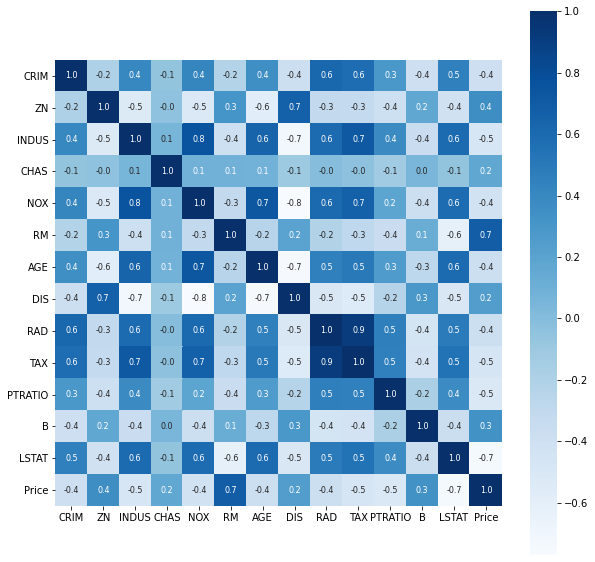

In [18]:
#creating a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation,cbar = True, square = True , fmt = '.1f',annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [19]:
#splitting the dataset to X and Y
X = housing_dataset_df.drop(columns = 'Price', axis = 1)
Y = housing_dataset_df['Price']
print(X.shape,Y.shape)

(506, 13) (506,)


In [20]:
#splitting the data into training and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 2)

In [21]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(506, 13) (404, 13) (102, 13) (404,) (102,)


In [22]:
#training our model
#loading our model
model = XGBRegressor()


In [23]:
#fitting the model for training
model.fit(X_train,Y_train)

[08:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [24]:
#evaluation
training_data_prediction = model.predict(X_train)

In [25]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print('Rsquared value: ',score_1)
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print('Mean Absolute Error: ', score_2)

Rsquared value:  0.9733349094832763
Mean Absolute Error:  1.145314053261634


In [26]:
#testing data 
testing_data_prediction = model.predict(X_test)

In [27]:
# R squared error
score_1 = metrics.r2_score(Y_test, testing_data_prediction)
print('Rsquared value: ',score_1)
score_2 = metrics.mean_absolute_error(Y_test,testing_data_prediction)
print('Mean Absolute Error: ', score_2)

Rsquared value:  0.9115937697657654
Mean Absolute Error:  1.9922956859364223


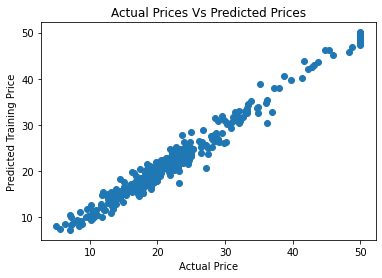

In [28]:
#creating a visualization between perdicted values and original prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Training Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

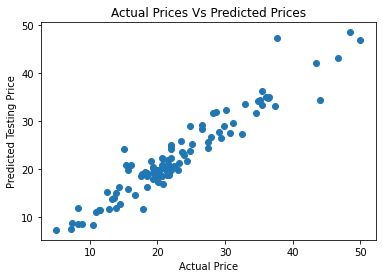

In [29]:
#creating a visualization between predicted values and original prices
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Testing Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()